# Experiment 3.2

HPO for Transformer for h=192 for EED



In [1]:
from matplotlib import rc
import matplotlib.pylab as plt

rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)
plt.rcParams['figure.dpi'] = 300

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%pwd

'/Users/timw/Documents/University/thesis_2/scripts/Exp3.2_HPO_Transformer_EED'

## Import data and plot all benchmark results

In [2]:
hpo_table = pd.read_csv("./../../results/hpo_table_Exp3.2_metrics.csv", index_col=0)
hpo_table2 = pd.read_csv("./../../results/hpo_table_Exp3.3_metrics.csv", index_col=0)
hpo_table = pd.concat([hpo_table, hpo_table2], axis=0)

hpo_table["adamW"] = hpo_table["optim"].apply(lambda x: 1 if x == "adamW" else 0)

hpo_table["OneCycle"] = hpo_table["lradj"].apply(lambda x: 1 if x == "TST" else 0)

# Deal with NaN values
hpo_table["dropout"] = hpo_table["dropout"].apply(lambda x: 0.05 if pd.isna(x) else x)

def custom_function(row):
    if pd.isna(row['weight_decay']):
        if row['OneCycle']:
            return 0.01
        else:
            return 0.0
    return row['weight_decay']

hpo_table['weight_decay'] = hpo_table.apply(custom_function, axis=1)

hpo_table.drop(columns=["optim", "lradj"], inplace=True)

In [3]:
hpo_table.sum(axis=0)

learning_rate         0.014500
batch_size         1856.000000
e_layers            162.000000
d_layers            162.000000
d_model            6400.000000
seq_len            9744.000000
pred_len           5568.000000
dropout               2.950000
weight_decay          0.710100
MSE                   2.631652
MAE                   5.861040
Epochs              384.000000
Time[min]          1580.000000
Params[Mio.]        252.460000
Max_mem[MB]      411950.130000
adamW                22.000000
OneCycle             10.000000
dtype: float64

# MSE vs model size

<Axes: title={'center': 'MSE'}, xlabel='Params[Mio.]'>

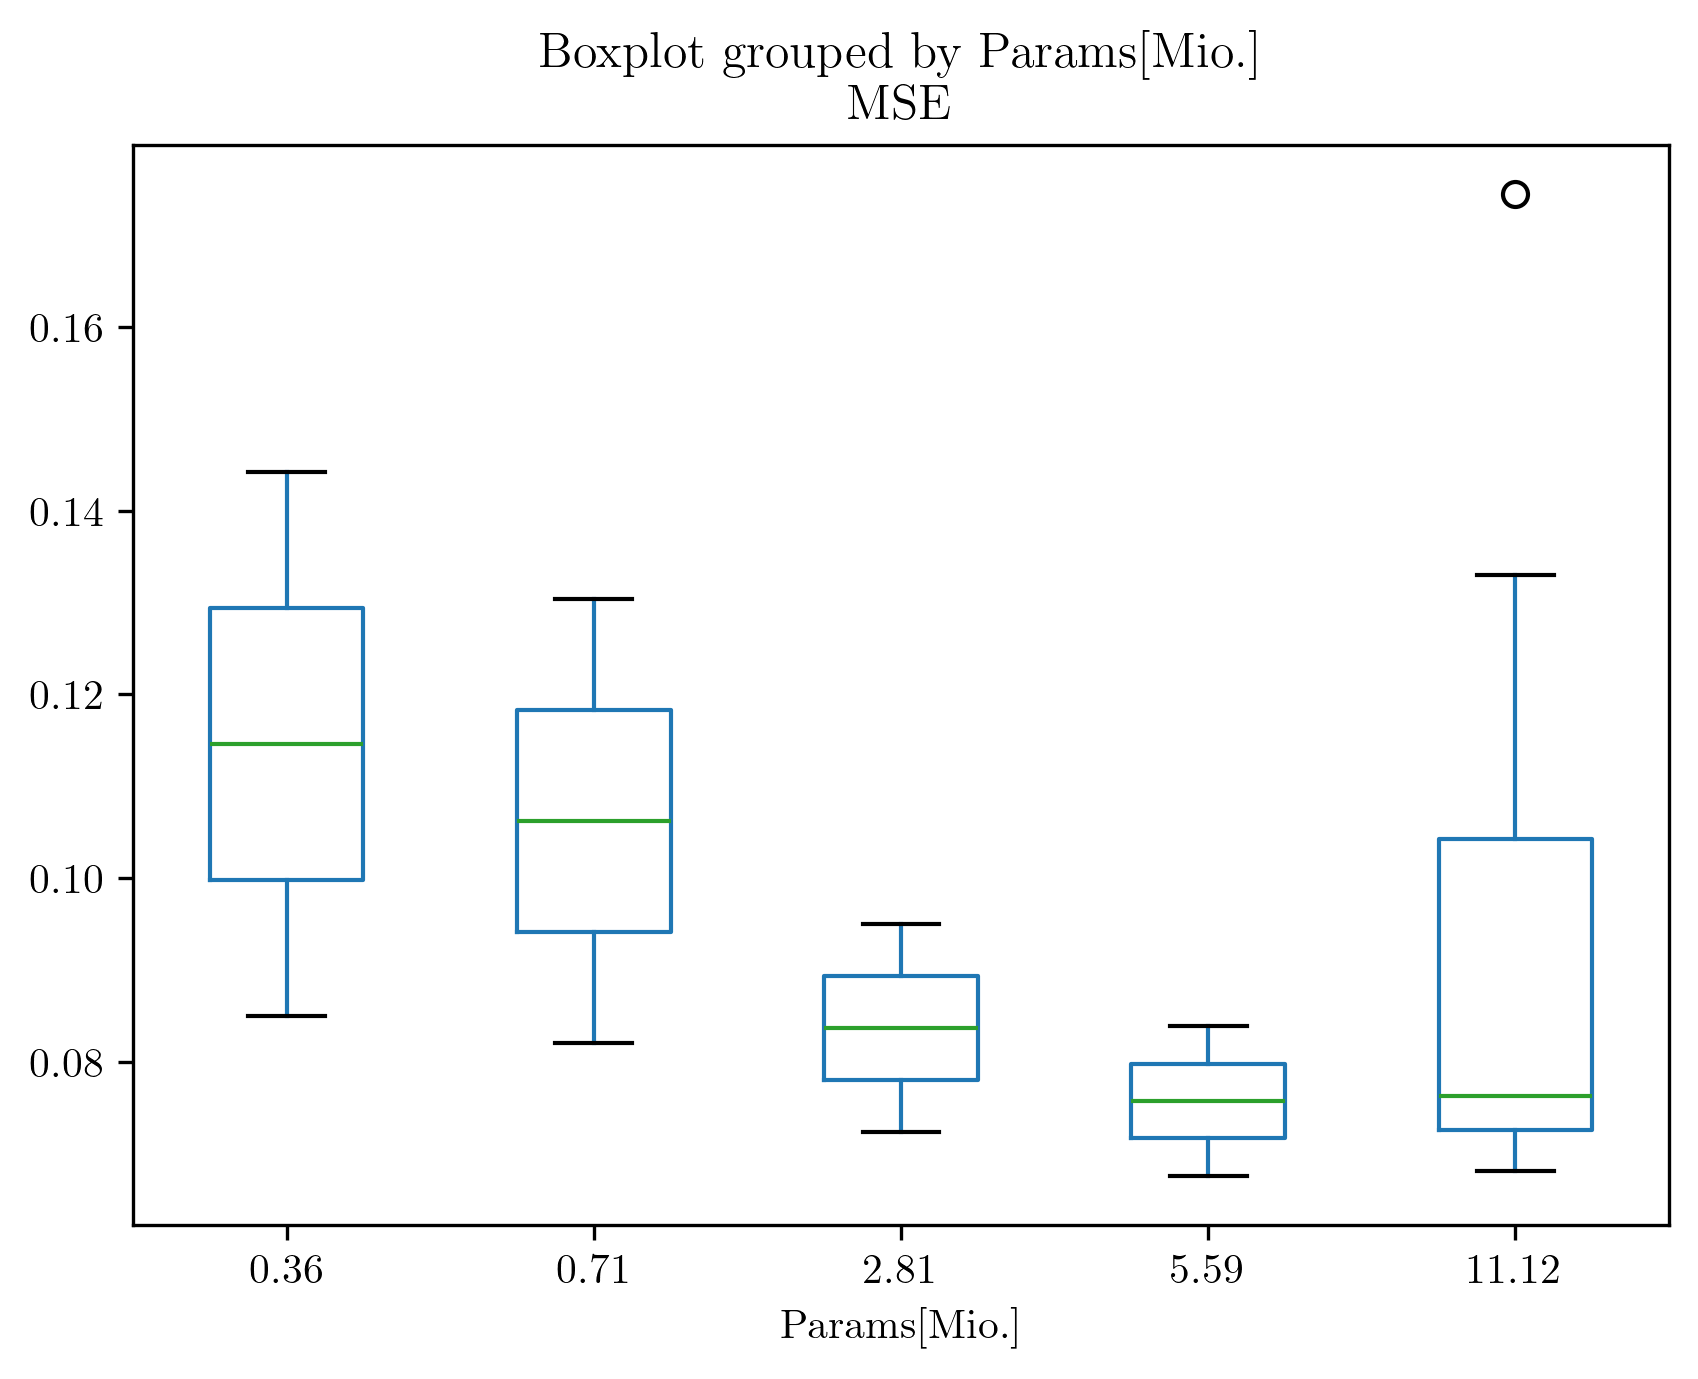

In [4]:
hpo_table.boxplot(by="Params[Mio.]", column="MSE", grid=False)

                       learning_rate  batch_size  d_layers  d_model  seq_len  \
e_layers Params[Mio.]                                                          
3        0.36               0.000300        64.0       3.0     64.0    336.0   
         5.59               0.000300        64.0       3.0    256.0    336.0   
6        0.71               0.000300        64.0       6.0     64.0    336.0   
         2.81               0.000300        64.0       6.0    128.0    336.0   
         11.12              0.000576        64.0       6.0    256.0    336.0   

                       pred_len   dropout  weight_decay       MSE       MAE  \
e_layers Params[Mio.]                                                         
3        0.36             192.0  0.050000      0.010000  0.114594  0.236422   
         5.59             192.0  0.050000      0.010000  0.075738  0.183926   
6        0.71             192.0  0.050000      0.010000  0.106196  0.223439   
         2.81             192.0  0.050000   

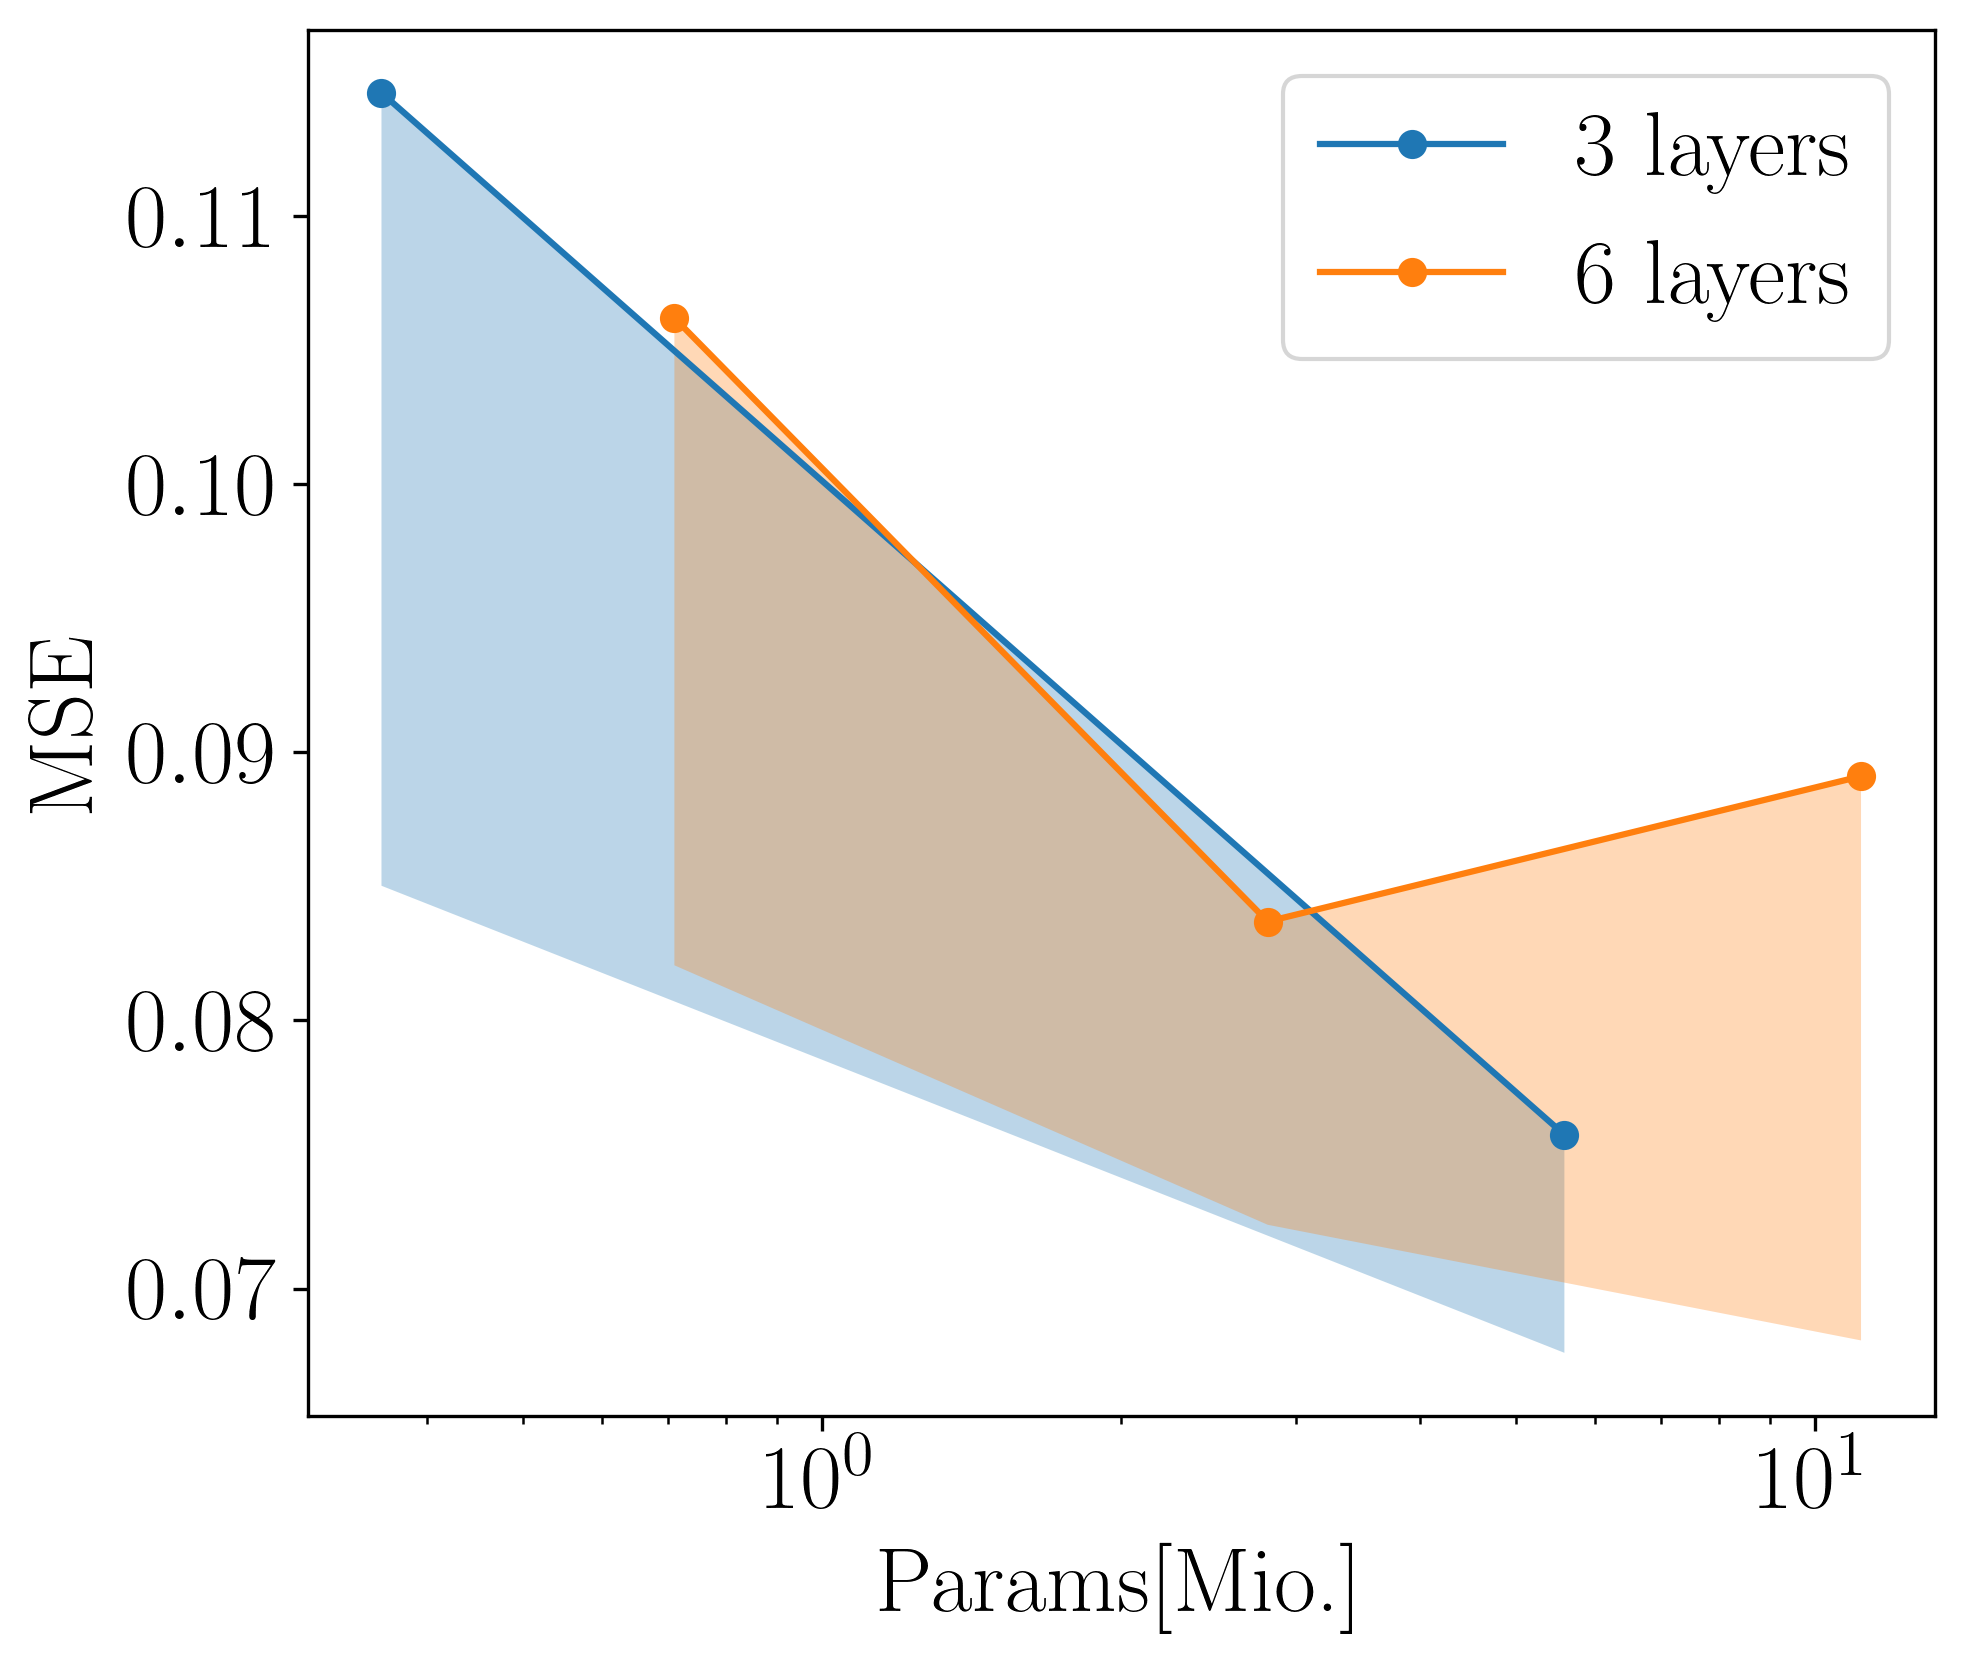

In [5]:
import matplotlib
matplotlib.rcParams.update({'font.size': 22})

mc_table = hpo_table[hpo_table["seq_len"]==336].groupby(["e_layers", "Params[Mio.]"]).mean()
mc_min_table = hpo_table[hpo_table["seq_len"]==336].groupby(["e_layers", "Params[Mio.]"]).min()
print(mc_table)
#print(mc_table.xs(2, level="e_layers").index)

#Plot MSE over Params. Each e_layer has a different color
fig, ax = plt.subplots(1,1,figsize=(7, 6))
for i in [3, 6]:
    ax.plot(mc_table.xs(i, level="e_layers").index, mc_table.xs(i, level="e_layers")["MSE"], label=f"{i} layers", marker="o")
    ax.fill_between(mc_table.xs(i, level="e_layers").index, mc_min_table.xs(i, level="e_layers")["MSE"], mc_table.xs(i, level="e_layers")["MSE"], alpha=0.3)

ax.set_xlabel("Params[Mio.]")
ax.set_ylabel("MSE")
ax.legend(loc="upper right")
ax.set_xscale("log")
# Move the x-axis to the top
#ax.xaxis.set_ticks_position('top')
#ax.xaxis.set_label_position('top')
plt.show()

In [6]:
hpo_table[hpo_table["MSE"]<0.08].groupby("e_layers").mean()

,learning_rate,batch_size,d_layers,d_model,seq_len,pred_len,dropout,weight_decay,MSE,MAE,Epochs,Time[min],Params[Mio.],Max_mem[MB],adamW,OneCycle
e_layers,,,,,,,,,,,,,,,,
3,0.00050,64.0,3.0,256.000000,336.0,192.0,0.05,0.010000,0.067604,0.172153,10.0,24.000000,5.590,7946.890000,1.0,0.000000
6,0.00054,64.0,6.0,247.466667,336.0,192.0,0.08,0.037333,0.073321,0.178335,14.6,67.133333,10.566,16001.403333,0.8,0.533333


In [7]:
sorted_df = hpo_table.sort_values(by="MSE")
sorted_df.head(50)

,learning_rate,batch_size,e_layers,d_layers,d_model,seq_len,pred_len,dropout,weight_decay,MSE,MAE,Epochs,Time[min],Params[Mio.],Max_mem[MB],adamW,OneCycle
6,0.0005,64,3,3,256,336,192,0.05,0.0100,0.067604,0.172153,10,24,5.59,7946.89,1,0
10,0.0005,64,6,6,256,336,192,0.05,0.1000,0.068067,0.172023,9,42,11.12,15530.59,1,0
13,0.0005,64,6,6,256,336,192,0.05,0.0000,0.069100,0.173270,10,45,11.12,15530.59,1,0
3,0.0005,64,6,6,256,336,192,0.05,0.0000,0.069167,0.173365,10,45,11.12,15530.59,0,0
9,0.0005,64,6,6,256,336,192,0.05,0.0000,0.070621,0.176304,9,61,11.12,25407.05,1,0
5,0.0005,64,6,6,256,336,192,0.05,0.1000,0.072066,0.175013,11,51,11.12,15530.59,1,1
8,0.0005,64,6,6,128,336,192,0.05,0.0100,0.072379,0.181011,13,43,2.81,12716.33,1,0
1,0.0005,64,6,6,256,336,192,0.05,0.0100,0.072596,0.175853,11,50,11.12,15530.59,0,1
8,0.0005,64,6,6,256,336,192,0.05,0.0100,0.072726,0.175937,11,49,11.12,15530.59,1,1
4,0.0001,64,6,6,256,336,192,0.05,0.1000,0.073938,0.177649,30,139,11.12,15530.59,1,1


In [8]:
sorted_df.tail(30)

,learning_rate,batch_size,e_layers,d_layers,d_model,seq_len,pred_len,dropout,weight_decay,MSE,MAE,Epochs,Time[min],Params[Mio.],Max_mem[MB],adamW,OneCycle
6,0.0005,64,3,3,256,336,192,0.05,0.0100,0.067604,0.172153,10,24,5.59,7946.89,1,0
10,0.0005,64,6,6,256,336,192,0.05,0.1000,0.068067,0.172023,9,42,11.12,15530.59,1,0
13,0.0005,64,6,6,256,336,192,0.05,0.0000,0.069100,0.173270,10,45,11.12,15530.59,1,0
3,0.0005,64,6,6,256,336,192,0.05,0.0000,0.069167,0.173365,10,45,11.12,15530.59,0,0
9,0.0005,64,6,6,256,336,192,0.05,0.0000,0.070621,0.176304,9,61,11.12,25407.05,1,0
5,0.0005,64,6,6,256,336,192,0.05,0.1000,0.072066,0.175013,11,51,11.12,15530.59,1,1
8,0.0005,64,6,6,128,336,192,0.05,0.0100,0.072379,0.181011,13,43,2.81,12716.33,1,0
1,0.0005,64,6,6,256,336,192,0.05,0.0100,0.072596,0.175853,11,50,11.12,15530.59,0,1
8,0.0005,64,6,6,256,336,192,0.05,0.0100,0.072726,0.175937,11,49,11.12,15530.59,1,1
4,0.0001,64,6,6,256,336,192,0.05,0.1000,0.073938,0.177649,30,139,11.12,15530.59,1,1


In [9]:
best_mse = sorted_df.iloc[0]["MSE"]
best_mse

0.0676042139530181

## Params[Mio.] vs MSE

In [10]:
hpo_table.sort_values(by=["Params[Mio.]","MSE"], inplace=True)
hpo_table

,learning_rate,batch_size,e_layers,d_layers,d_model,seq_len,pred_len,dropout,weight_decay,MSE,MAE,Epochs,Time[min],Params[Mio.],Max_mem[MB],adamW,OneCycle
5,0.0005,64,3,3,64,336,192,0.05,0.0100,0.085022,0.200112,13,22,0.36,5898.90,1,0
0,0.0001,64,3,3,64,336,192,0.05,0.0100,0.144165,0.272733,13,24,0.36,5898.90,1,0
7,0.0005,64,6,6,64,336,192,0.05,0.0100,0.082056,0.193722,13,39,0.71,11403.52,1,0
2,0.0001,64,6,6,64,336,192,0.05,0.0100,0.130336,0.253155,13,39,0.71,11403.52,1,0
8,0.0005,64,6,6,128,336,192,0.05,0.0100,0.072379,0.181011,13,43,2.81,12716.33,1,0
3,0.0001,64,6,6,128,336,192,0.05,0.0100,0.094997,0.212119,13,43,2.81,12716.33,1,0
6,0.0005,64,3,3,256,336,192,0.05,0.0100,0.067604,0.172153,10,24,5.59,7946.89,1,0
1,0.0001,64,3,3,256,336,192,0.05,0.0100,0.083871,0.195699,13,31,5.59,7946.89,1,0
10,0.0005,64,6,6,256,336,192,0.05,0.1000,0.068067,0.172023,9,42,11.12,15530.59,1,0
13,0.0005,64,6,6,256,336,192,0.05,0.0000,0.069100,0.173270,10,45,11.12,15530.59,1,0


In [11]:
hpo_table[hpo_table["adamW"] == 0]

,learning_rate,batch_size,e_layers,d_layers,d_model,seq_len,pred_len,dropout,weight_decay,MSE,MAE,Epochs,Time[min],Params[Mio.],Max_mem[MB],adamW,OneCycle
3,0.0005,64,6,6,256,336,192,0.05,0.0000,0.069167,0.173365,10,45,11.12,15530.59,0,0
1,0.0005,64,6,6,256,336,192,0.05,0.0100,0.072596,0.175853,11,50,11.12,15530.59,0,1
14,0.0010,64,6,6,256,336,192,0.05,0.0100,0.076275,0.180141,11,49,11.12,15530.59,0,1
9,0.0005,64,6,6,256,336,192,0.50,0.0001,0.104282,0.227330,13,59,11.12,15530.59,0,0
15,0.0010,64,6,6,256,336,192,0.05,0.0000,0.115476,0.238996,7,31,11.12,15530.59,0,0
0,0.0005,64,6,6,256,336,192,0.05,0.0100,0.133022,0.251894,15,69,11.12,15530.59,0,1
2,0.0005,64,6,6,256,336,192,0.05,0.0100,0.174488,0.301486,13,60,11.12,15530.59,0,0


In [12]:
hpo_table.tail(10)

,learning_rate,batch_size,e_layers,d_layers,d_model,seq_len,pred_len,dropout,weight_decay,MSE,MAE,Epochs,Time[min],Params[Mio.],Max_mem[MB],adamW,OneCycle
11,0.0005,64,6,6,256,336,192,0.20,0.0100,0.076401,0.183783,11,52,11.12,15530.59,1,0
12,0.0005,64,6,6,256,336,192,0.20,0.1000,0.076427,0.184011,11,51,11.12,15530.59,1,0
7,0.0005,64,6,6,256,336,192,0.20,0.1000,0.078783,0.185005,11,51,11.12,15530.59,1,1
6,0.0005,64,6,6,256,336,192,0.20,0.0100,0.080331,0.187941,10,47,11.12,15530.59,1,1
9,0.0005,64,6,6,256,336,192,0.50,0.0001,0.104282,0.227330,13,59,11.12,15530.59,0,0
17,0.0010,64,6,6,256,336,192,0.05,0.0000,0.115468,0.238980,7,31,11.12,15530.59,1,0
15,0.0010,64,6,6,256,336,192,0.05,0.0000,0.115476,0.238996,7,31,11.12,15530.59,0,0
10,0.0005,64,6,6,256,336,192,0.50,0.0500,0.120719,0.239695,12,54,11.12,15530.59,1,0
0,0.0005,64,6,6,256,336,192,0.05,0.0100,0.133022,0.251894,15,69,11.12,15530.59,0,1
2,0.0005,64,6,6,256,336,192,0.05,0.0100,0.174488,0.301486,13,60,11.12,15530.59,0,0


In [13]:
reduced_hpo_table = hpo_table[["learning_rate", "batch_size", "Params[Mio.]", "MSE", "seq_len", "e_layers", "d_model", "dropout", "weight_decay", "OneCycle", "adamW"]]
print(reduced_hpo_table.shape)

(29, 11)


# Parallel coordinate plot

In [14]:
import matplotlib.pyplot as plt
from matplotlib.path import Path
import matplotlib.patches as patches
from matplotlib.colors import Normalize
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.cm import ScalarMappable


def parallel_coordinates(data, column_names, threshold=None, ynames=None):
    fig, host = plt.subplots(figsize=(14, 6))

    if threshold is not None:
        data = data[data["MSE"] < threshold]
    
    ynames = column_names if ynames is None else ynames
        
    data = data[column_names]
    ys = data.to_numpy()
    N = ys.shape[0]

    # Normalize data
    ymins = ys.min(axis=0)
    ymaxs = ys.max(axis=0)
    dys = ymaxs - ymins
    ymins -= dys * 0.1  # add 5% padding below and above
    ymaxs += dys * 0.1
    dys = ymaxs - ymins

    # transform all data to be compatible with the main axis
    zs = np.zeros_like(ys)
    zs[:, 0] = ys[:, 0]
    zs[:, 1:] = (ys[:, 1:] - ymins[1:]) / dys[1:] * dys[0] + ymins[0]

    # Add small horizontal jitter for better visibility
    jitter_strength = 0.00002
    jitter = np.random.normal(0, jitter_strength, zs.shape)
    jitter[:, 0] = np.random.normal(0, 0.00002, zs[:, 0].shape)
    jitter[:, -1] = 0  # Don't jitter the last column
    zs += jitter
    #zs[:, -2][zs[:, -2] < 0] = 0 # Avoid negative values

    # Create the parallel coordinates
    axes = [host] + [host.twinx() for i in range(ys.shape[1] - 1)]
    
    for i, ax in enumerate(axes):
        ax.set_ylim(ymins[i], ymaxs[i])
        ax.spines['top'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        if ax != host:
            ax.spines['left'].set_visible(False)
            ax.yaxis.set_ticks_position('right')
            ax.spines["right"].set_position(("axes", i / (ys.shape[1] - 1)))
        ax.tick_params(axis='y', labelsize=22)
        ax.tick_params(axis='x', length=0)
            #ax.set_yscale('log')
        
    #axes[-3].set_yscale('log')
    

    host.set_xlim(0, ys.shape[1] - 1) 
    host.set_xticks(range(ys.shape[1]))
    host.set_xticklabels(ynames, fontsize=22)
    host.tick_params(axis='x', which='major', pad=7)
    host.spines['right'].set_visible(False)
    host.xaxis.tick_top()
    #host.set_title('Parallel Coordinate Plot Transformer pred_len 24', fontsize=22)

    # Use a colormap and normalize based on the last column of ys
    color_norm = Normalize(vmin=ys[:, -1].min(), vmax=ys[:, -1].max())
    cmap = plt.get_cmap('viridis')

    sm = ScalarMappable(norm=color_norm, cmap=cmap)
    sm.set_array([])

    for j in range(N):
        color = cmap(color_norm(ys[j, -1]))
        verts = list(zip([x for x in np.linspace(0, len(ys) - 1, len(ys) * 3 - 2, endpoint=True)], np.repeat(zs[j, :], 3)[1:-1]))
        codes = [Path.MOVETO] + [Path.CURVE4 for _ in range(len(verts) - 1)]
        path = Path(verts, codes)
        patch = patches.PathPatch(path, facecolor='none', lw=1, edgecolor=color)
        host.add_patch(patch)
    
    # Bring MSE axis to front (before color bar)
    axes[-1].set_zorder(10) 
    
    # Color bar
    divider = make_axes_locatable(plt.gca())
    cax = divider.append_axes("right", size="8%", pad=0.0)
    cbar = plt.colorbar(sm, cax=cax)
    cbar.ax.yaxis.set_ticks([])
  
    plt.tight_layout()
    plt.show()


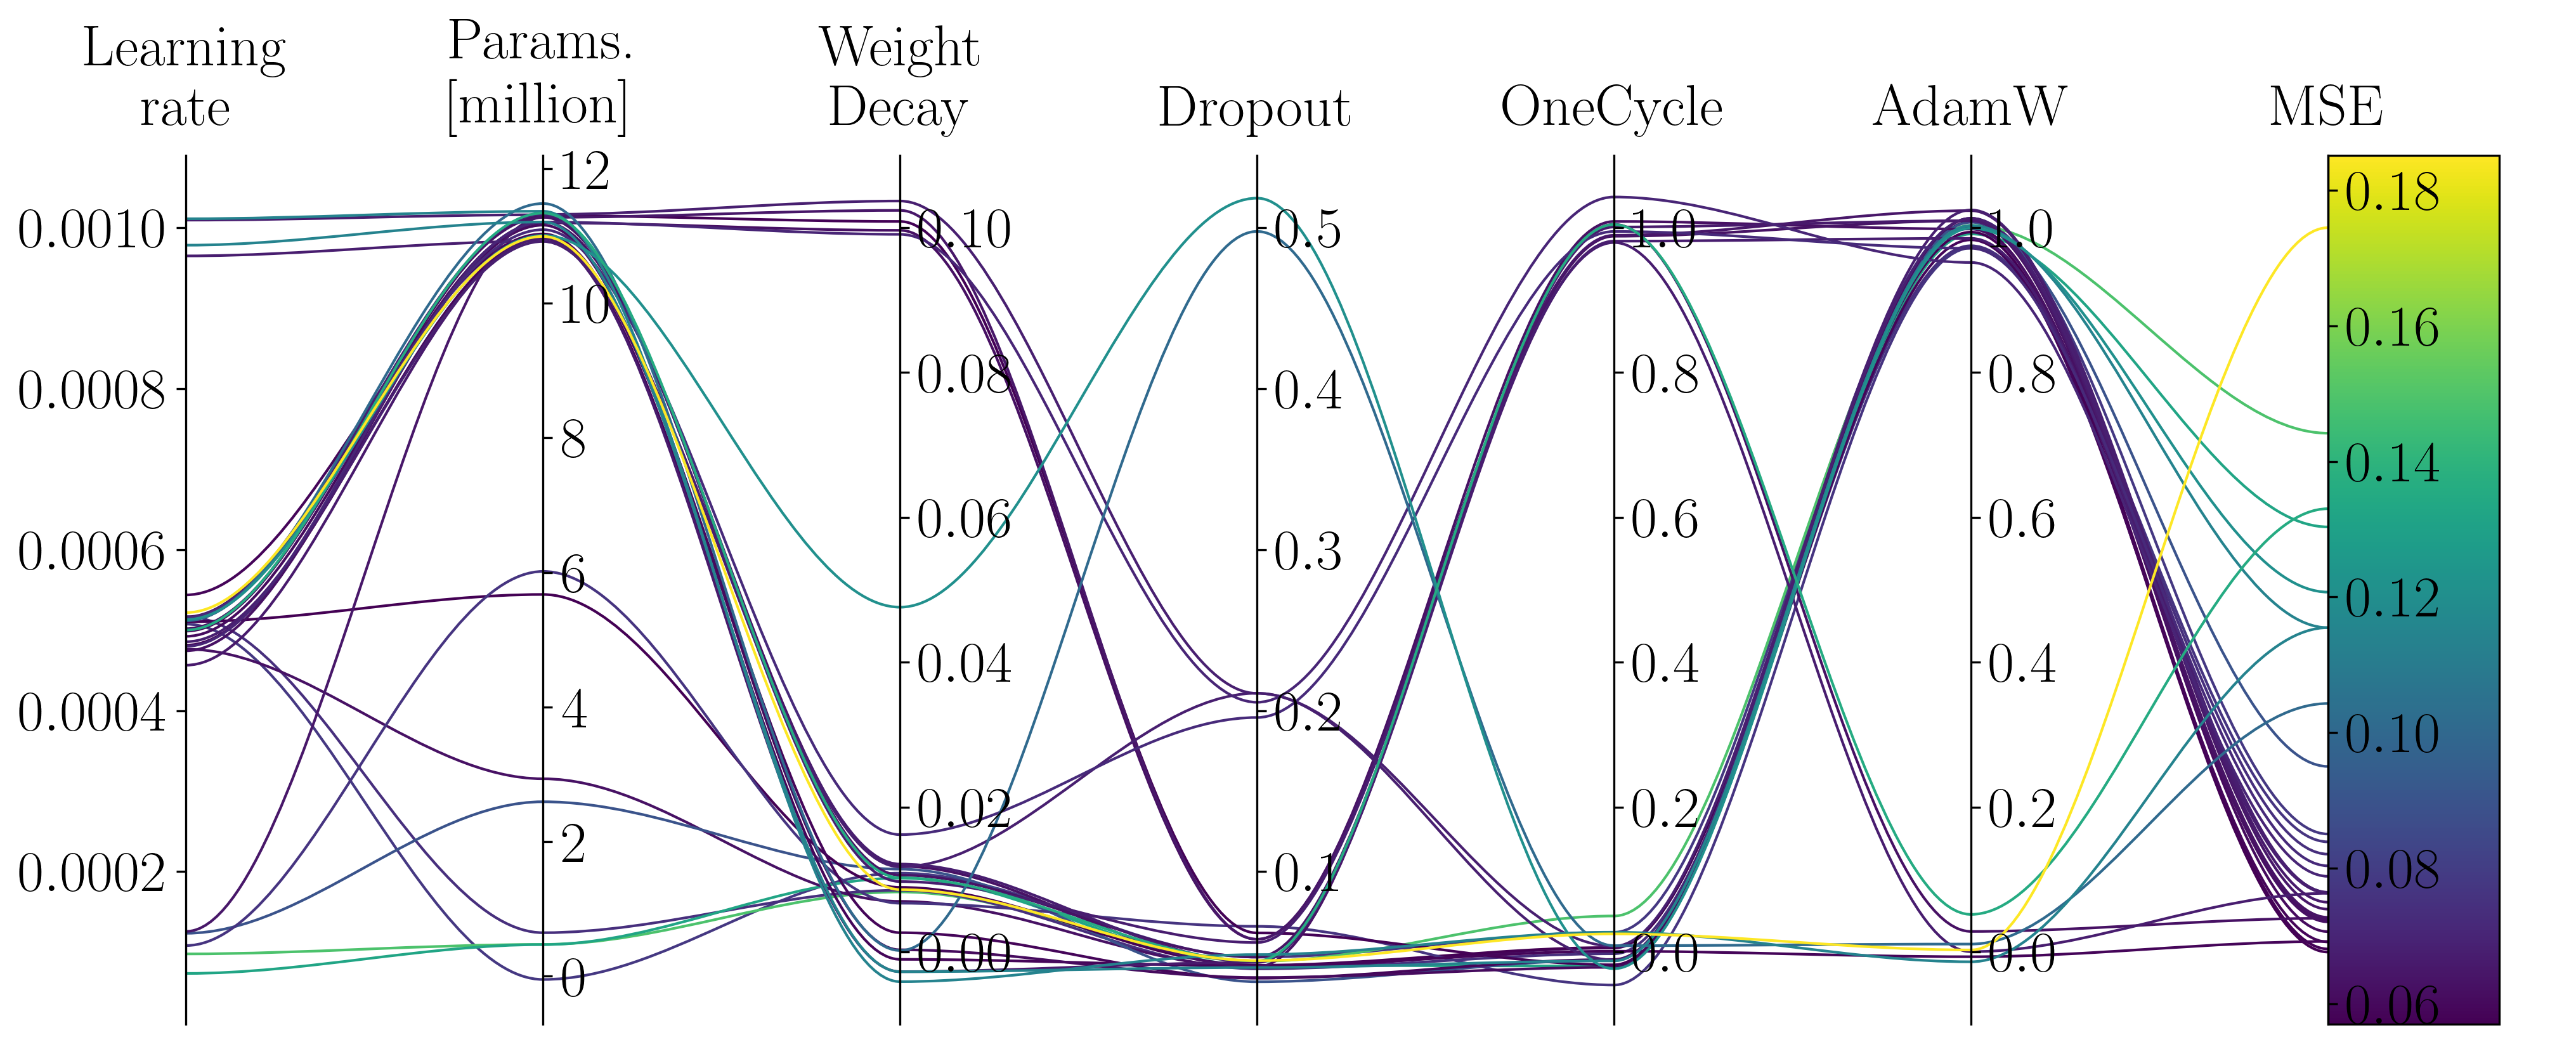

In [15]:
parallel_coordinates(reduced_hpo_table, ["learning_rate", "Params[Mio.]", "weight_decay", "dropout", "OneCycle", "adamW", "MSE"], ynames=["Learning \n rate", "Params. \n [million]", "Weight \n Decay", "Dropout", "OneCycle", "AdamW", "MSE"])

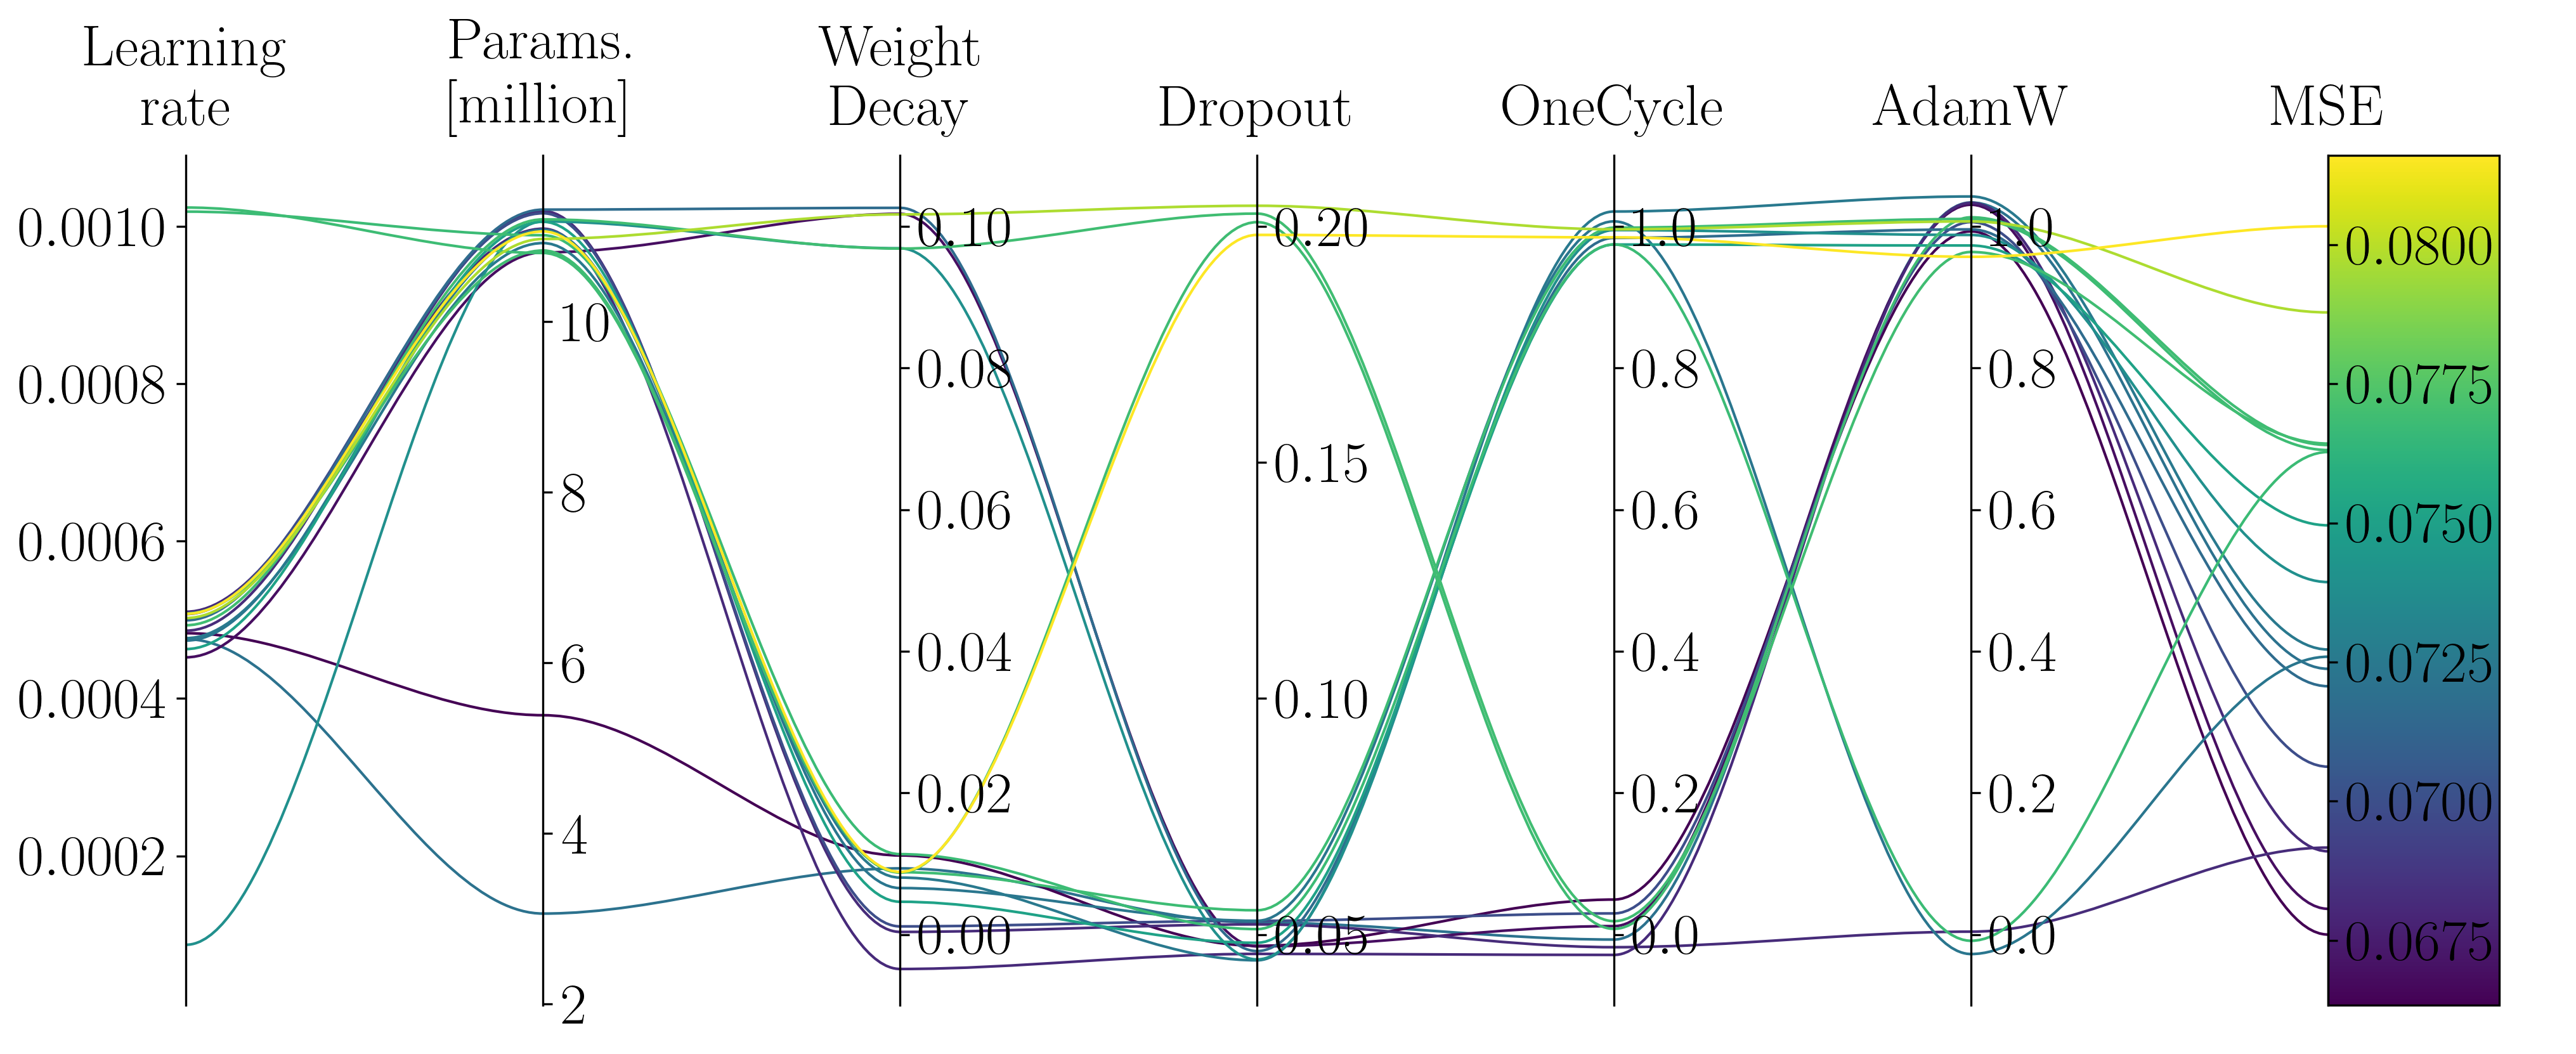

In [16]:
parallel_coordinates(reduced_hpo_table, ["learning_rate", "Params[Mio.]", "weight_decay", "dropout", "OneCycle", "adamW", "MSE"], threshold=0.067604*1.2, ynames=["Learning \n rate", "Params. \n [million]", "Weight \n Decay", "Dropout", "OneCycle", "AdamW", "MSE"])